In [1]:
import tensorflow as tf
import json
import cv2 as cv
import numpy as np

In [2]:
# Reading data from .json

In [3]:
def readNameImages(filename):
    read = json.loads(open(filename).read())
    image_names = []
    
    for i in range(len(read)):
        image_names.append(read[i]['image_name'])
        
        
    return image_names
    

In [4]:
image_names = readNameImages('data.json')
print (len(image_names))

2248


Reading the image according the names and resize them

In [5]:
def imageToResize(path_image):
    path = 'Images/'+ path_image
    image = cv.imread(path)
    image = cv.resize(image, (240, 240))
    image = np.array(image, dtype=np.float32)
    
    return image

In [6]:
#Proves

In [7]:
image = imageToResize(image_names[0])

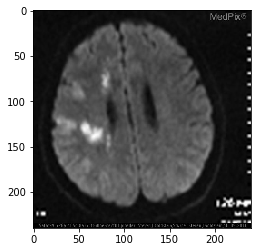

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(image/256)
plt.show()

In [9]:
image.shape

(240, 240, 3)

In [10]:
image2 = [image, image, image, image]
image2 = np.array(image2, dtype=np.float32)
image2.shape

(4, 240, 240, 3)

In [11]:
image2 = image2.transpose((3, 0, 1, 2))
image2.shape

(3, 4, 240, 240)

In [12]:
# MODEL

In [110]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Convolution3D, MaxPooling3D, ZeroPadding3D
from keras.optimizers import SGD

def get_model(summary=False):
    """ Return the Keras model of the network
    """
    model = Sequential()
    # 1st layer group
    model.add(Convolution3D(64, 3, 3, 3, activation='relu', 
                            border_mode='same', name='conv1',
                            strides=(1, 1, 1), 
                            input_shape=(3, 4, 240, 240)))
    model.add(MaxPooling3D(pool_size=(1, 2, 2), strides=(1, 2, 2), 
                           border_mode='same', name='pool1'))
    # 2nd layer group
    model.add(Convolution3D(128, 3, 3, 3, activation='relu', 
                            border_mode='same', name='conv2',
                            strides=(1, 1, 1)))
    model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2), 
                           border_mode='valid', name='pool2'))
    # 3rd layer group
    model.add(Convolution3D(256, 3, 3, 3, activation='relu', 
                            border_mode='same', name='conv3a',
                            strides=(1, 1, 1)))
    model.add(Convolution3D(256, 3, 3, 3, activation='relu', 
                            border_mode='same', name='conv3b',
                            strides=(1, 1, 1)))
    model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2), 
                           border_mode='same', name='pool3'))
    # 4th layer group
    model.add(Convolution3D(512, 3, 3, 3, activation='relu', 
                            border_mode='same', name='conv4a',
                            strides=(1, 1, 1)))
    model.add(Convolution3D(512, 3, 3, 3, activation='relu', 
                            border_mode='same', name='conv4b',
                            strides=(1, 1, 1)))
    model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2), 
                           border_mode='same', name='pool4'))
    # 5th layer group
    model.add(Convolution3D(512, 3, 3, 3, activation='relu', 
                            border_mode='same', name='conv5a',
                            strides=(1, 1, 1)))
    model.add(Convolution3D(512, 3, 3, 3, activation='relu', 
                            border_mode='same', name='conv5b',
                            strides=(1, 1, 1)))
    model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2), 
                           border_mode='same', name='pool5'))
    model.add(Flatten())

    if summary:
        print(model.summary())
    return model

model = get_model(summary=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv3D)               (None, 3, 4, 240, 64)     414784    
_________________________________________________________________
pool1 (MaxPooling3D)         (None, 3, 2, 120, 64)     0         
_________________________________________________________________
conv2 (Conv3D)               (None, 3, 2, 120, 128)    221312    
_________________________________________________________________
pool2 (MaxPooling3D)         (None, 1, 1, 60, 128)     0         
_________________________________________________________________
conv3a (Conv3D)              (None, 1, 1, 60, 256)     884992    
_________________________________________________________________
conv3b (Conv3D)              (None, 1, 1, 60, 256)     1769728   
_________________________________________________________________
pool3 (MaxPooling3D)         (None, 1, 1, 30, 256)     0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv3D` call to the Keras 2 API: `Conv3D(64, (3, 3, 3), activation="relu", name="conv1", strides=(1, 1, 1), input_shape=(3, 4, 240..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `MaxPooling3D` call to the Keras 2 API: `MaxPooling3D(pool_size=(1, 2, 2), strides=(1, 2, 2), name="pool1", padding="same")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv3D` call to the Keras 2 API: `Conv3D(128, (3, 3, 3), activation="relu", name="conv2", strides=(1, 1, 1), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `MaxPooling3D` call to the Keras 2 API: `MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2), name="pool2", padding="valid")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: 

In [111]:
#Proves

In [112]:
output = model.predict(np.array([image2]))

In [113]:
output.shape

(1, 4096)

In [114]:
aux = output[0]
aux.shape

(4096,)

In [115]:
#FEATURE EXTRACTION

In [116]:
def getFeatures():
    
    features_list = []
    
    for i in range(len(image_names)):
        image_curr = imageToResize(image_names[i])
        image_curr = [image_curr, image_curr, image_curr, image_curr]
        image_curr = np.array(image_curr, dtype=np.float32)
        image_curr = image_curr.transpose((3, 0, 1, 2))
        
        # Get the features
        feature = model.predict(np.array([image_curr]))
        feature = feature[0]
        features_list.append(feature)
        if( i % 100 == 0):
            print("feature", i)
        
    return features_list

features_list = getFeatures()
features_list = np.array(features_list, dtype=np.float32)
features_list.shape

feature 0
feature 100
feature 200
feature 300
feature 400
feature 500
feature 600
feature 700
feature 800
feature 900
feature 1000
feature 1100
feature 1200
feature 1300
feature 1400
feature 1500
feature 1600
feature 1700
feature 1800
feature 1900
feature 2000
feature 2100
feature 2200


(2248, 4096)

In [117]:
# Save data into a csv file

In [118]:
def saveData(data, name):
    np.save(name, data)
    print("Data guardada")

In [119]:
saveData(features_list, 'features_images.npy')

Data guardada


In [120]:
def readData(name):
    data = np.load(name)
    return data

In [121]:
data = readData('features_images.npy')

In [122]:
data.shape

(2248, 4096)